In [1]:
%matplotlib inline
import numpy as np
import healpy as hp
import matplotlib.pylab as plt

Restore maps of the airmass computed every 5-15 minutes. Crop it down to only those mjd's computed every 15 min.

In [2]:
restore_file = '/Users/yoachim/gitRepos/sims_skybrightness_pre/data/healpix/59560.000000_59926.000000.npz'
disk_data = np.load(restore_file)
required_mjds = disk_data['header'][()]['required_mjds'].copy()
dict_of_lists = disk_data['dict_of_lists'][()].copy()
sky_brightness = disk_data['sky_brightness'][()].copy()
disk_data.close()

In [3]:
# Crop down to only the required mjds
even_mjd_indx = np.in1d(dict_of_lists['mjds'], required_mjds)
for key in dict_of_lists:
    dict_of_lists[key] = dict_of_lists[key][even_mjd_indx]
for key in sky_brightness:
    sky_brightness[key] = sky_brightness[key][even_mjd_indx, :]

In [9]:
# Check this is a full year (yes, little more)
print dict_of_lists['mjds'].max() - dict_of_lists['mjds'].min()
# Check that we have 15 min gaps (yup)
print np.median(np.diff(dict_of_lists['mjds']))*24*60.

365.319444104
14.999999986


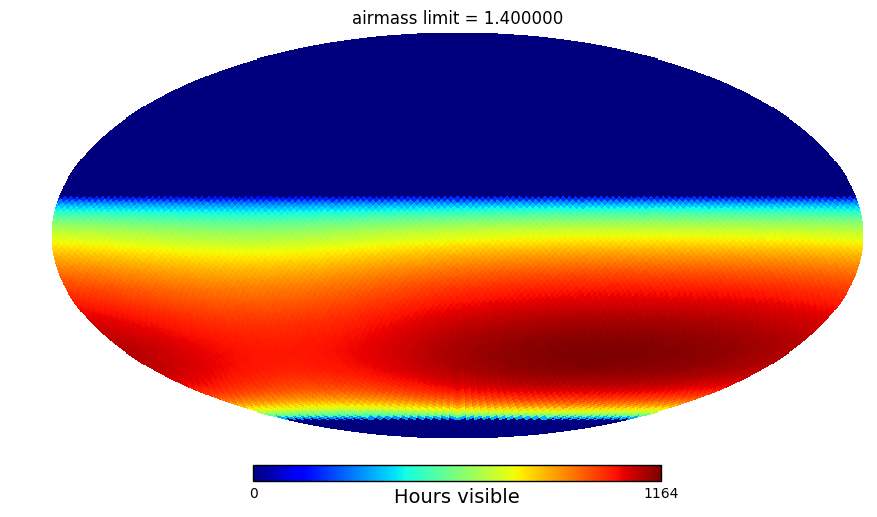

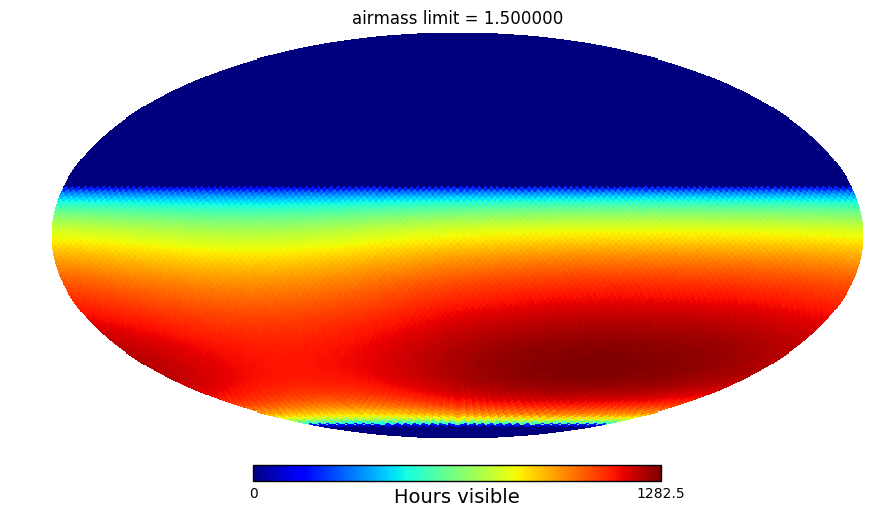

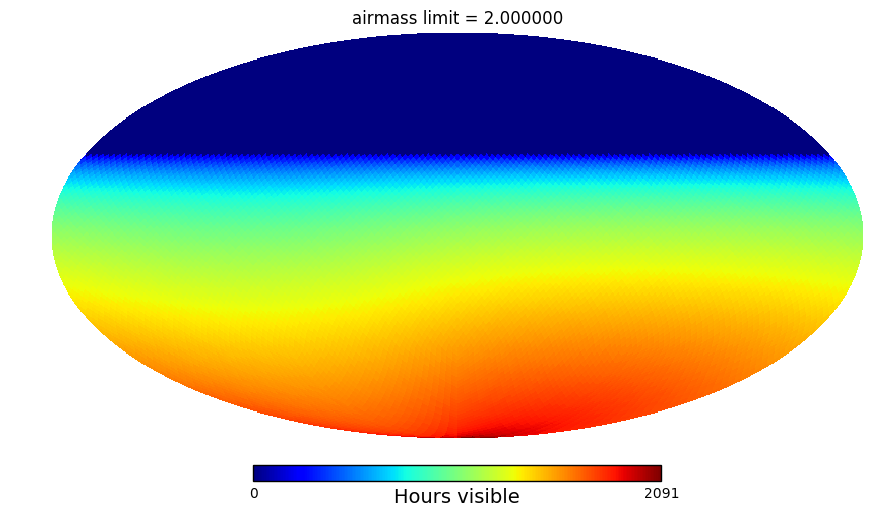

In [5]:
for airmass_limit in [1.4, 1.5, 2.0]:

    result = np.zeros(sky_brightness['r'].shape, dtype=float) +1
    result[np.where((dict_of_lists['airmass'] > airmass_limit) | (dict_of_lists['airmass'] < 1))] = 0
    result = np.sum(result, axis=0)
    result *= 15./60. # convert to rough hours
    hp.mollview(result, unit='Hours visible', title='airmass limit = %f' % airmass_limit)